# Optimizing functions with Gradient Descent

In this lab, we'll start by understanding gradient descent with simple single-variable functions featuring either one or multiple minima. Then, we'll explore optimizing functions with two variables by applying gradient descent to solve real-world Linear Regression problems with actual data. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use(['ggplot'])

### Optimizing functions with One Variable

#### 1. Function with One Global Minimum

The function $f(x) = x^2$ is a single-variable function with just one minimum point, often referred to as the global minimum. In this section of the lab, we'll employ gradient descent to minimize it.

To kick off the gradient descent process, you'll begin with an initial point $x_0$. Our objective is to locate a point where the derivative equals zero. To do this, we'll move in the opposite direction of the gradient, which points toward the steepest ascent of the function. The process is straightforward: we'll repeat these steps iteratively.
- Calculate the gradient $\frac{d}{dx}f(x_0)$
- Determine the next point using this expression: $$x_1 = x_0 - \alpha \frac{d}{dx}f(x_0)\tag{1}$$

First, define function $f\left(x\right)=x^2$ and its derivative $\frac{d}{dx}f\left(x\right)=2x$:

In [3]:
def f_square(x):
    return x**2

def dfdx_square(x):
    return 2*x

Now, let's plot the function: 

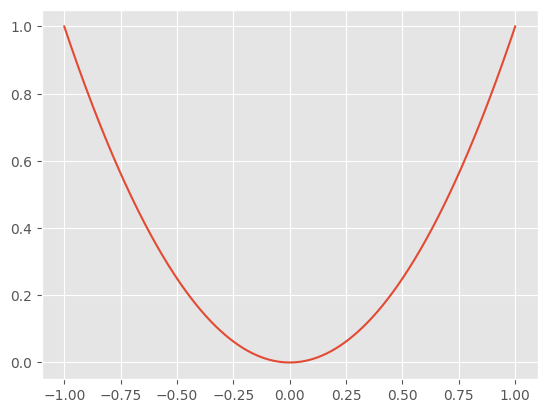

In [4]:
x = np.linspace(-1, 1, 1000)
plt.plot(x, np.vectorize(f_square)(x))

Next, we will implement gradient descent.The function we'll be creating should accept three parameters:
- `dfdx`: the name of the function responsible for calculating the derivative (in our case, `dfdx_square`)
- `x`: the current position
- `alpha`: the learning rate
- `num_iterations`: the number of iterations the update step will be executed.

In [5]:
def gradient_descent(dfdx, x, alpha, num_iterations):
    for iteration in range(num_iterations):
        x = x - alpha * dfdx(x)
    return x

In order to optimize the function, we need to set up the parameters and call the function `gradient_descent`:

In [6]:
x_initial = 0.75
alpha = 0.1
num_iterations = 100
min_x = gradient_descent(dfdx_square, x_initial, alpha, num_iterations)
print("The minimum is found at: ", min_x)

The minimum is found at:  1.527776982250866e-10


Let's try another set of parameters:

In [7]:
x_initial = -1
alpha = 0.3
num_iterations = 100
min_x = gradient_descent(dfdx_square, x_initial, alpha, num_iterations)
print("The minimum is found at: ", min_x)

The minimum is found at:  -1.6069380442589985e-40


#### 2. Function with Multiple Minima

The function $f(x) = (e^x - ln(x))sin(\pi x*2)$ is a single-variable function with multiple minima. In this section of the lab, we'll employ gradient descent to minimize the function considering the domain $[1,2]$.

First, let's define the function and its derivative as lambda expression. 

In [8]:
f_complex = lambda x : (np.exp(x) - np.log(x))*np.sin(np.pi*x*2)
dfdx_complex = lambda x: (np.exp(x) - 1/x) * np.sin(np.pi * x*2) + \
(np.exp(x) - np.log(x))*np.cos(np.pi*x*2) * 2 * np.pi

Now, let's plot the function with values of $x$ from 1 to 2. 

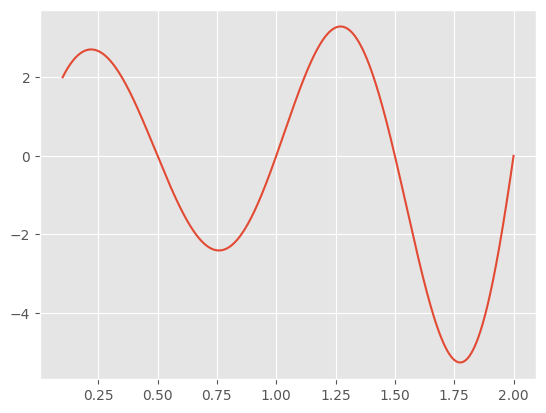

In [9]:
x = np.linspace(0.1,2,1000)
plt.plot(x, np.vectorize(f_complex)(x))

Now, call the `gradient_descent` function with a set of parameters:

In [10]:
x_initial = 0.4
alpha = 0.005
num_iterations = 100
x_min_1 = gradient_descent(dfdx_complex, x_initial, alpha, num_iterations)
print("The minimum is found at: ", x_min_1)

The minimum is found at:  0.7585728794500655


Let's try another set of parameters:

In [11]:
x_initial = 1.5
alpha = 0.005
num_iterations = 100
x_min_1 = gradient_descent(dfdx_complex, x_initial, alpha, num_iterations)
print("The minimum is found at: ", x_min_1)

The minimum is found at:  1.7751686214270586


### Optimizing functions with Two Variable

During this segment of the lab, we will construct a basic linear regression model aimed at predicting an employee's salary based on their years of experience. Our objective here is to create and optimize the cost function, which is the sum of squares, using gradient descent. The data is saved in a file `salary_data.csv`. The dataset has only two fields: `YearsExperience` and `Salary`. We are going to use `YearsExperience` to predict the `Salary` of a person. 

First, load the dataset into a dataframe using the `read_csv()` function of `pandas`.

In [12]:
df = pd.read_csv("salary_data.csv")

In [13]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Next, let's plot the dataset as a scatter plot. 

<Axes: xlabel='YearsExperience', ylabel='Salary'>

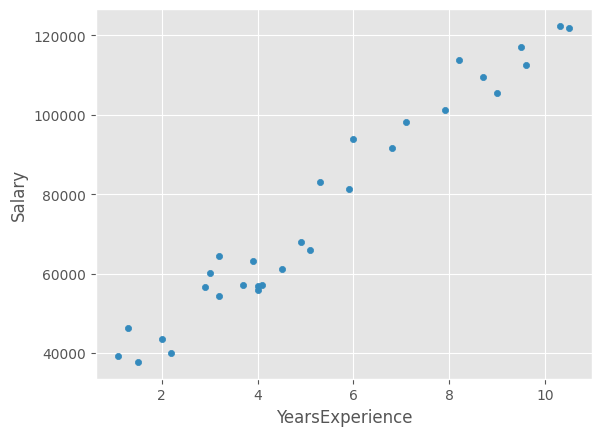

In [14]:
df.plot(kind = "scatter", x = "YearsExperience", y = "Salary")

For this example, we would like to learn the equation of a line $h(\theta) = \theta_0 + \theta_1 x$, where $x$ is the number number of years of experience and $h(\theta)$ is the predicted salary.

Assuming that we have a total of $m$ examples in our dataset and the $i^{th}$ example is denoted by $(x^{(i)}, y^{(i)})$, to find the line, we will minizime the  sum of squares cost function $$J(\theta) = \frac{1}{2m} \sum^m_{i=1}(h_\theta(x^{(i)}) - y^{(i)})^2\tag{1}$$

To use gradient descent algorithm,we need to update the parameters iteratively using the expressions:

$$ \theta_0 := \theta_0 - \frac{\alpha}{m} \sum^m_{i=1}(h_\theta(x^{(i)}) - y^{(i)})$$
$$ \theta_1 := \theta_1 - \frac{\alpha}{m} \sum^m_{i=1}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)} \tag{2}$$

where $\alpha$ is the learning rate. 

Let's start by splitting the features and the target variable into two variables `X` and `y`.

In [15]:
X = df["YearsExperience"]
y = df["Salary"]

To make gradient descent more effective, normalize `X` and `y` to bring them to the same units.

In [16]:
X_norm = (X - X.mean())/X.std()
y_norm = (y - y.mean())/y.std()

Now, we need to define the cost function according to the equation $(1)$:

In [17]:
def J(X, y, theta_0, theta_1):
    return 1/(2*len(y))*np.sum((theta_0 + theta_1*X - Y)**2)

Next, we will define two functions for the partial derivatives of $\theta_0$ and $\theta_1$.

In [18]:
def d_theta_1(X, y, theta_0, theta_1): return 1/len(y) * np.dot(theta_0 + theta_1*X - y, X)

In [19]:
def d_theta_0(X, y, theta_0, theta_1): return 1/len(y) * np.sum(theta_0 + theta_1*X - y)

We will implement the `gradient_descent` function that would update the parameters according to the equations $(1)$.

In [20]:
def gradient_descent(theta_0, theta_1, X, y, alpha, num_iterations):
    for iteration in range(num_iterations):
        new_theta_0 = theta_0 - alpha * d_theta_0(X,y, theta_0,theta_1)
        new_theta_1 = theta_1 - alpha * d_theta_1(X,y, theta_0,theta_1)
        theta_0 = new_theta_0
        theta_1 = new_theta_1
    return theta_0, theta_1

In [21]:
(theta_0, theta_1) = gradient_descent(0,0, X_norm, y_norm, 0.1, 1000)

Finally,we will make a scatter plot with our dataset and the line plot we learned from gradient descent. 

In [22]:
normalized_df = pd.DataFrame()
new_df["YearsExperience"] = X_norm
new_df["Salary"] = y_norm
new_df.plot(kind = "scatter", x = "YearsExperience", y = "Salary")
plt.plot(np.linspace(-1.5, 2, 1000), np.vectorize(lambda x: theta_0 + theta_1 *x)(np.linspace(-1.5, 2, 1000)))

NameError: name 'new_df' is not defined